In [1]:
from keras.datasets import mnist
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print("Original shapes: ")
print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

Original shapes: 
train_data shape: (60000, 28, 28),
train_labels shape: (60000,)
test_data shape: (10000, 28, 28),
test_labels shape: (10000,)


In [3]:
# dim_data = np.prod(train_data.shape[1:])
# train_data = train_data.reshape(-1, dim_data)
# test_data = test_data.reshape(-1, dim_data)
# print("Transformed shapes: ")
# print(f"train_data shape: {train_data.shape},\ntrain_labels shape: {train_labels.shape}")
# print(f"test_data shape: {test_data.shape},\ntest_labels shape: {test_labels.shape}")

In [4]:
train_data = (train_data / 255).astype('float32')
test_data = (test_data / 255).astype('float32')

In [5]:
from keras.utils import to_categorical
classes = np.unique(train_labels)
n_classes = len(classes)
print(f"classes: {classes}, number of classes: {n_classes}")
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

classes: [0 1 2 3 4 5 6 7 8 9], number of classes: 10


In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_units = 128
time_steps = 28
n_inputs = 28
n_classes = 10
batch_size = 128
n_epochs = 5

model = Sequential()
model.add(LSTM(n_units, input_shape=(time_steps, n_inputs)))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_data, train_labels, batch_size= batch_size, epochs= n_epochs, validation_data=(test_data, test_labels), shuffle=True)

c:\Pipeline_development\python312_venv_ml\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.6454 - loss: 1.0529 - val_accuracy: 0.9314 - val_loss: 0.2216
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9395 - loss: 0.2016 - val_accuracy: 0.9534 - val_loss: 0.1475
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9646 - loss: 0.1125 - val_accuracy: 0.9711 - val_loss: 0.0941
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9748 - loss: 0.0830 - val_accuracy: 0.9765 - val_loss: 0.0784
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9783 - loss: 0.0665 - val_accuracy: 0.9792 - val_loss: 0.0671


Text(0.5, 1.0, 'Accuracy Curves')

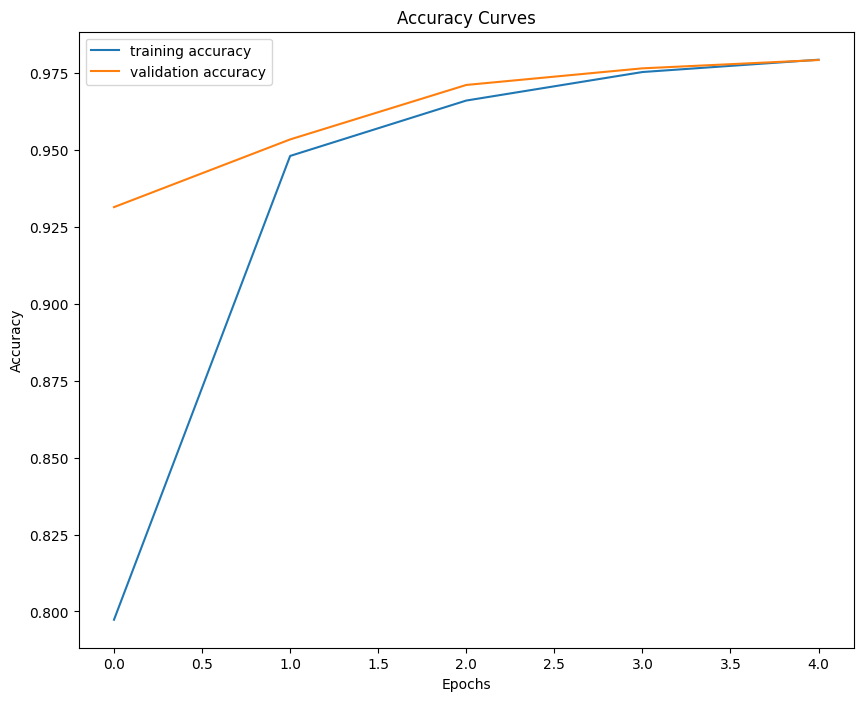

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.title('Accuracy Curves')

In [8]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict class probabilities
predicted_probabilities = model.predict(test_data)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert one-hot encoded test labels to class labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
0.9792


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

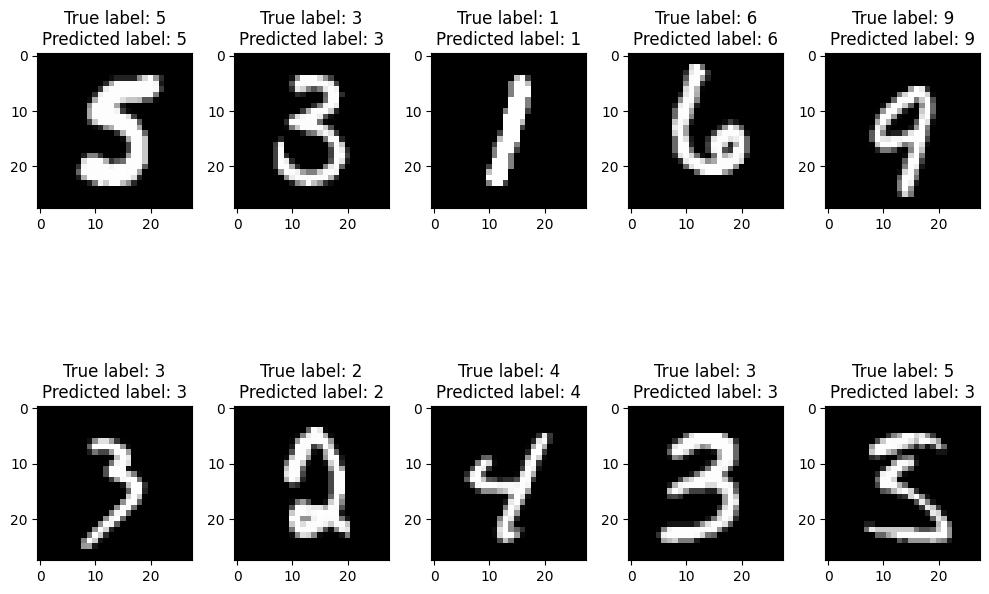

In [9]:
plt.figure(figsize=(10, 8))
for i in range(10):
    random_index = np.random.randint(10000)
    predicted_label = model.predict(test_data[[random_index]])
    predicted_label = np.argmax(predicted_label)
    true_label = np.argmax(test_labels[random_index])
    plt.subplot(2, 5, i + 1)
    plt.title(f"True label: {true_label}\nPredicted label: {predicted_label}")
    plt.imshow(test_data[random_index], cmap="gray")
plt.tight_layout()
plt.show